In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

from utils import *
from distance import *
from ksets import *
from synthetic import *

In [ ]:
instances = {
    instance: load_pb_ohe(f'data/{instance}.pb')
    for instance in ('poland_warszawa_2023_wesola', 'poland_warszawa_2023_bielany')
}

In [41]:
def make_plot(pos, clusters, instance, type):
    plt.title(instance + ', ' + type)
    plt.scatter(pos[:,0], pos[:,1], c=clusters, s=8, alpha=0.6)
    plt.show()

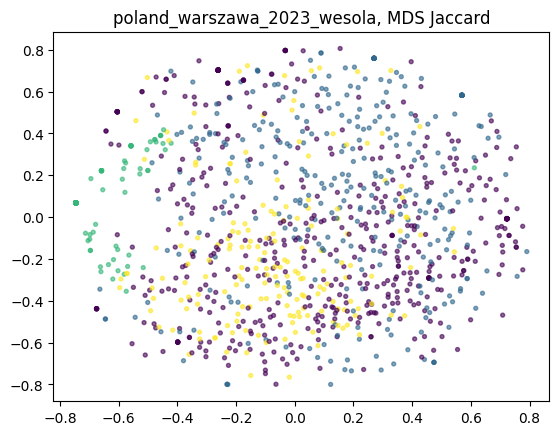

0.34670791314917765


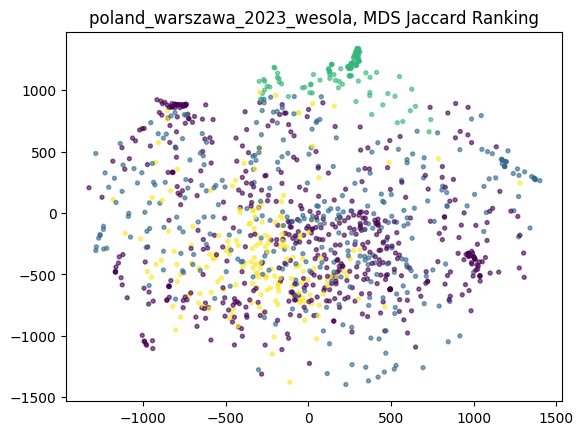

0.36436386690517164


In [15]:
for instance, (meta, projects, votes) in list(instances.items())[:1]:
    #clusters = KMeans(n_clusters=8, n_init=10).fit(votes).labels_
    dist = jaccard(votes, votes)
    rankings = normalize_by_ranking(dist)
    rankings = rankings + rankings.T
    clusters = KMedoids(n_clusters=4, metric='precomputed').fit(dist).labels_
    #make_plot(PCA(n_components=2).fit_transform(votes), clusters, instance, 'PCA')
    #make_plot(MDS(n_components=2, n_jobs=-1).fit_transform(votes), clusters, instance, 'MDS')
    mds_jaccard = MDS(n_components=2, n_jobs=-1, dissimilarity='precomputed').fit(dist)
    make_plot(mds_jaccard.embedding_, clusters, instance, 'MDS Jaccard')
    print(stress(mds_jaccard, dist))
    mds_rankings = MDS(n_components=2, n_jobs=-1, dissimilarity='precomputed').fit(rankings)
    make_plot(mds_rankings.embedding_, clusters, instance, 'MDS Jaccard Ranking')
    print(stress(mds_rankings, rankings))
    #make_plot(TSNE(n_components=2, perplexity=30, n_jobs=-1).fit_transform(votes), clusters, instance, 'TSNE')

In [40]:
model = Mixture(
    (ImpartialCulture(0.2, 20), 0.5),
    (ImpartialCulture(0.8, 20), 0.5),
)
votes, labels = model.sample(100, return_labels=True)
d_jaccard = jaccard(votes, votes)
rankings = normalize_by_ranking(d_jaccard)
rankings = rankings + rankings.T
instance = str(model)
make_plot(MDS(n_components=2, n_jobs=-1, dissimilarity='precomputed').fit_transform(d_jaccard), labels, instance, 'MDS Jaccard')
make_plot(MDS(n_components=2, n_jobs=-1, dissimilarity='precomputed').fit_transform(rankings), labels, instance, 'MDS Jaccard Ranking')
make_plot(TSNE(n_components=2, perplexity=10, n_jobs=-1).fit_transform(votes), labels, instance, 'TSNE')

/home/greg/Work/Mimuw/MSc/msc/distance.py:21: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(1 - a / b, nan=0)


NameError: name 'make_plot' is not defined

In [ ]:
mdss = {
    instance: MDS(n_components=2, n_jobs=2, metric=True).fit(votes)
    for instance, (meta, projects, votes) in instances.items()
}

In [ ]:
for instance, (meta, projects, votes) in list(instances.items()):
    clusters = KMeans(n_clusters=8, n_init=10).fit(votes).labels_
    DE = euclidean_distances(mdss[instance].embedding_)
    real_distances = euclidean_distances(instances[instance][2])
    stress = 0.5 * np.sum((DE - real_distances)**2)
    stress1 = np.sqrt(stress / (0.5 * np.sum(real_distances**2)))
    fig, ax = plt.subplots()
    plt.text(
        0.98,
        0.98,
        f"stress = {stress1:.3f}",
        ha='right',
        va='top',
        transform=ax.transAxes
    )
    make_plot(mdss[instance].embedding_, clusters, instance, 'MDS')

In [5]:
IndependentApproval([0.5, 0.1])

IndependentApproval(p=[0.5, 0.1])